# Training Neural Network on Noisy Cubic Function (Regression)

In [7]:
# importing libraries.
import numpy as np
import matplotlib.pyplot as plt
from model import NeuralNetwork, SGD

## 1. Generate Synthetic Cubic Dataset

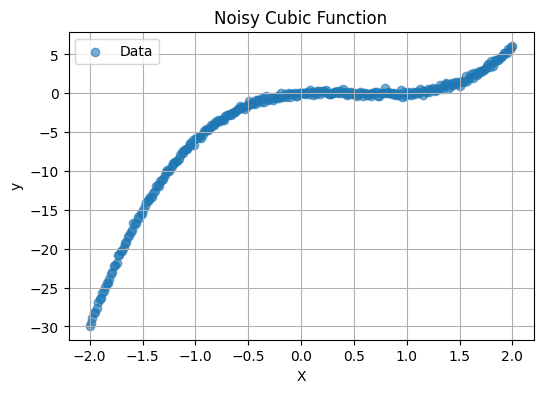

In [8]:
#Below code generate synthetic cubic data and also plot the data points.
np.random.seed(42)
X = np.linspace(-2, 2, 300).reshape(-1, 1)
y = 2 * X**3 - 3 * X**2 + X + 0.2 * np.random.randn(*X.shape)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, label='Data', alpha=0.6)
plt.title("Noisy Cubic Function")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

## 2. Initialize Model and Optimizer

In [9]:
# Here we initialize the model and optimize it, we have 1 input size, 64 hidden size, and 1 output size
# we also add activation and  SGD as optimizer.
model = NeuralNetwork(input_size=1, hidden_size=64, output_size=1, activation='relu')
optimizer = SGD(learning_rate=0.01, batch_size=32)

## 3. Training Loop

In [10]:
# training the data set with 1000 epochs and adding the loss data into 
# lost_history list. 
epochs = 1000
loss_history = []

for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in optimizer.get_batches(X, y):
        y_pred = model.feedforward(X_batch)
        loss = model.mean_squared_error(y_batch, y_pred)
        total_loss += loss
        model.backward(X_batch, y_batch, optimizer.learning_rate)

    loss_history.append(total_loss)
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


Epoch 0, Loss: 761.5584
Epoch 20, Loss: 25.5447
Epoch 40, Loss: 14.8354
Epoch 60, Loss: 8.0650
Epoch 80, Loss: 7.6342
Epoch 100, Loss: 6.7450
Epoch 120, Loss: 6.7179
Epoch 140, Loss: 5.9119
Epoch 160, Loss: 5.7539
Epoch 180, Loss: 5.6030
Epoch 200, Loss: 5.3251
Epoch 220, Loss: 4.4912
Epoch 240, Loss: 4.0605
Epoch 260, Loss: 3.4123
Epoch 280, Loss: 2.8069
Epoch 300, Loss: 2.4280
Epoch 320, Loss: 2.2263
Epoch 340, Loss: 1.7404
Epoch 360, Loss: 1.6389
Epoch 380, Loss: 1.3518
Epoch 400, Loss: 1.1819
Epoch 420, Loss: 1.1078
Epoch 440, Loss: 0.9315
Epoch 460, Loss: 0.9358
Epoch 480, Loss: 0.8652
Epoch 500, Loss: 0.8152
Epoch 520, Loss: 0.7416
Epoch 540, Loss: 0.7274
Epoch 560, Loss: 0.6957
Epoch 580, Loss: 0.7088
Epoch 600, Loss: 0.6538
Epoch 620, Loss: 0.6482
Epoch 640, Loss: 0.6248
Epoch 660, Loss: 0.6181
Epoch 680, Loss: 0.6576
Epoch 700, Loss: 0.6369
Epoch 720, Loss: 0.5776
Epoch 740, Loss: 0.5921
Epoch 760, Loss: 0.5625
Epoch 780, Loss: 0.5677
Epoch 800, Loss: 0.5587
Epoch 820, Loss: 0

## 4. Loss Curve

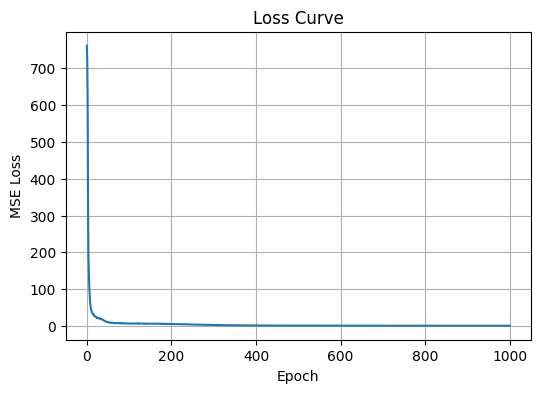

In [11]:
# Here we plot the loss curve.
plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

## 5. Final Prediction vs Ground Truth

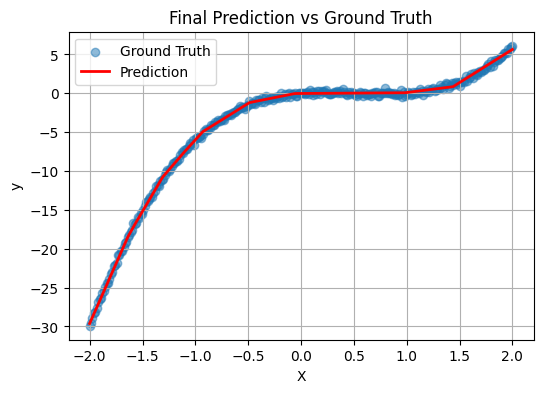

In [12]:
# In below code we plot the predictions vs. Ground Truth
y_pred_all = model.feedforward(X)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, label='Ground Truth', alpha=0.5)
plt.plot(X, y_pred_all, color='red', label='Prediction', linewidth=2)
plt.title("Final Prediction vs Ground Truth")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
